In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/Training.csv')
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check missing values

print(f'Total Missing Values:\n{df.isna().sum()}')

Total Missing Values:
pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<function matplotlib.pyplot.show(close=None, block=None)>

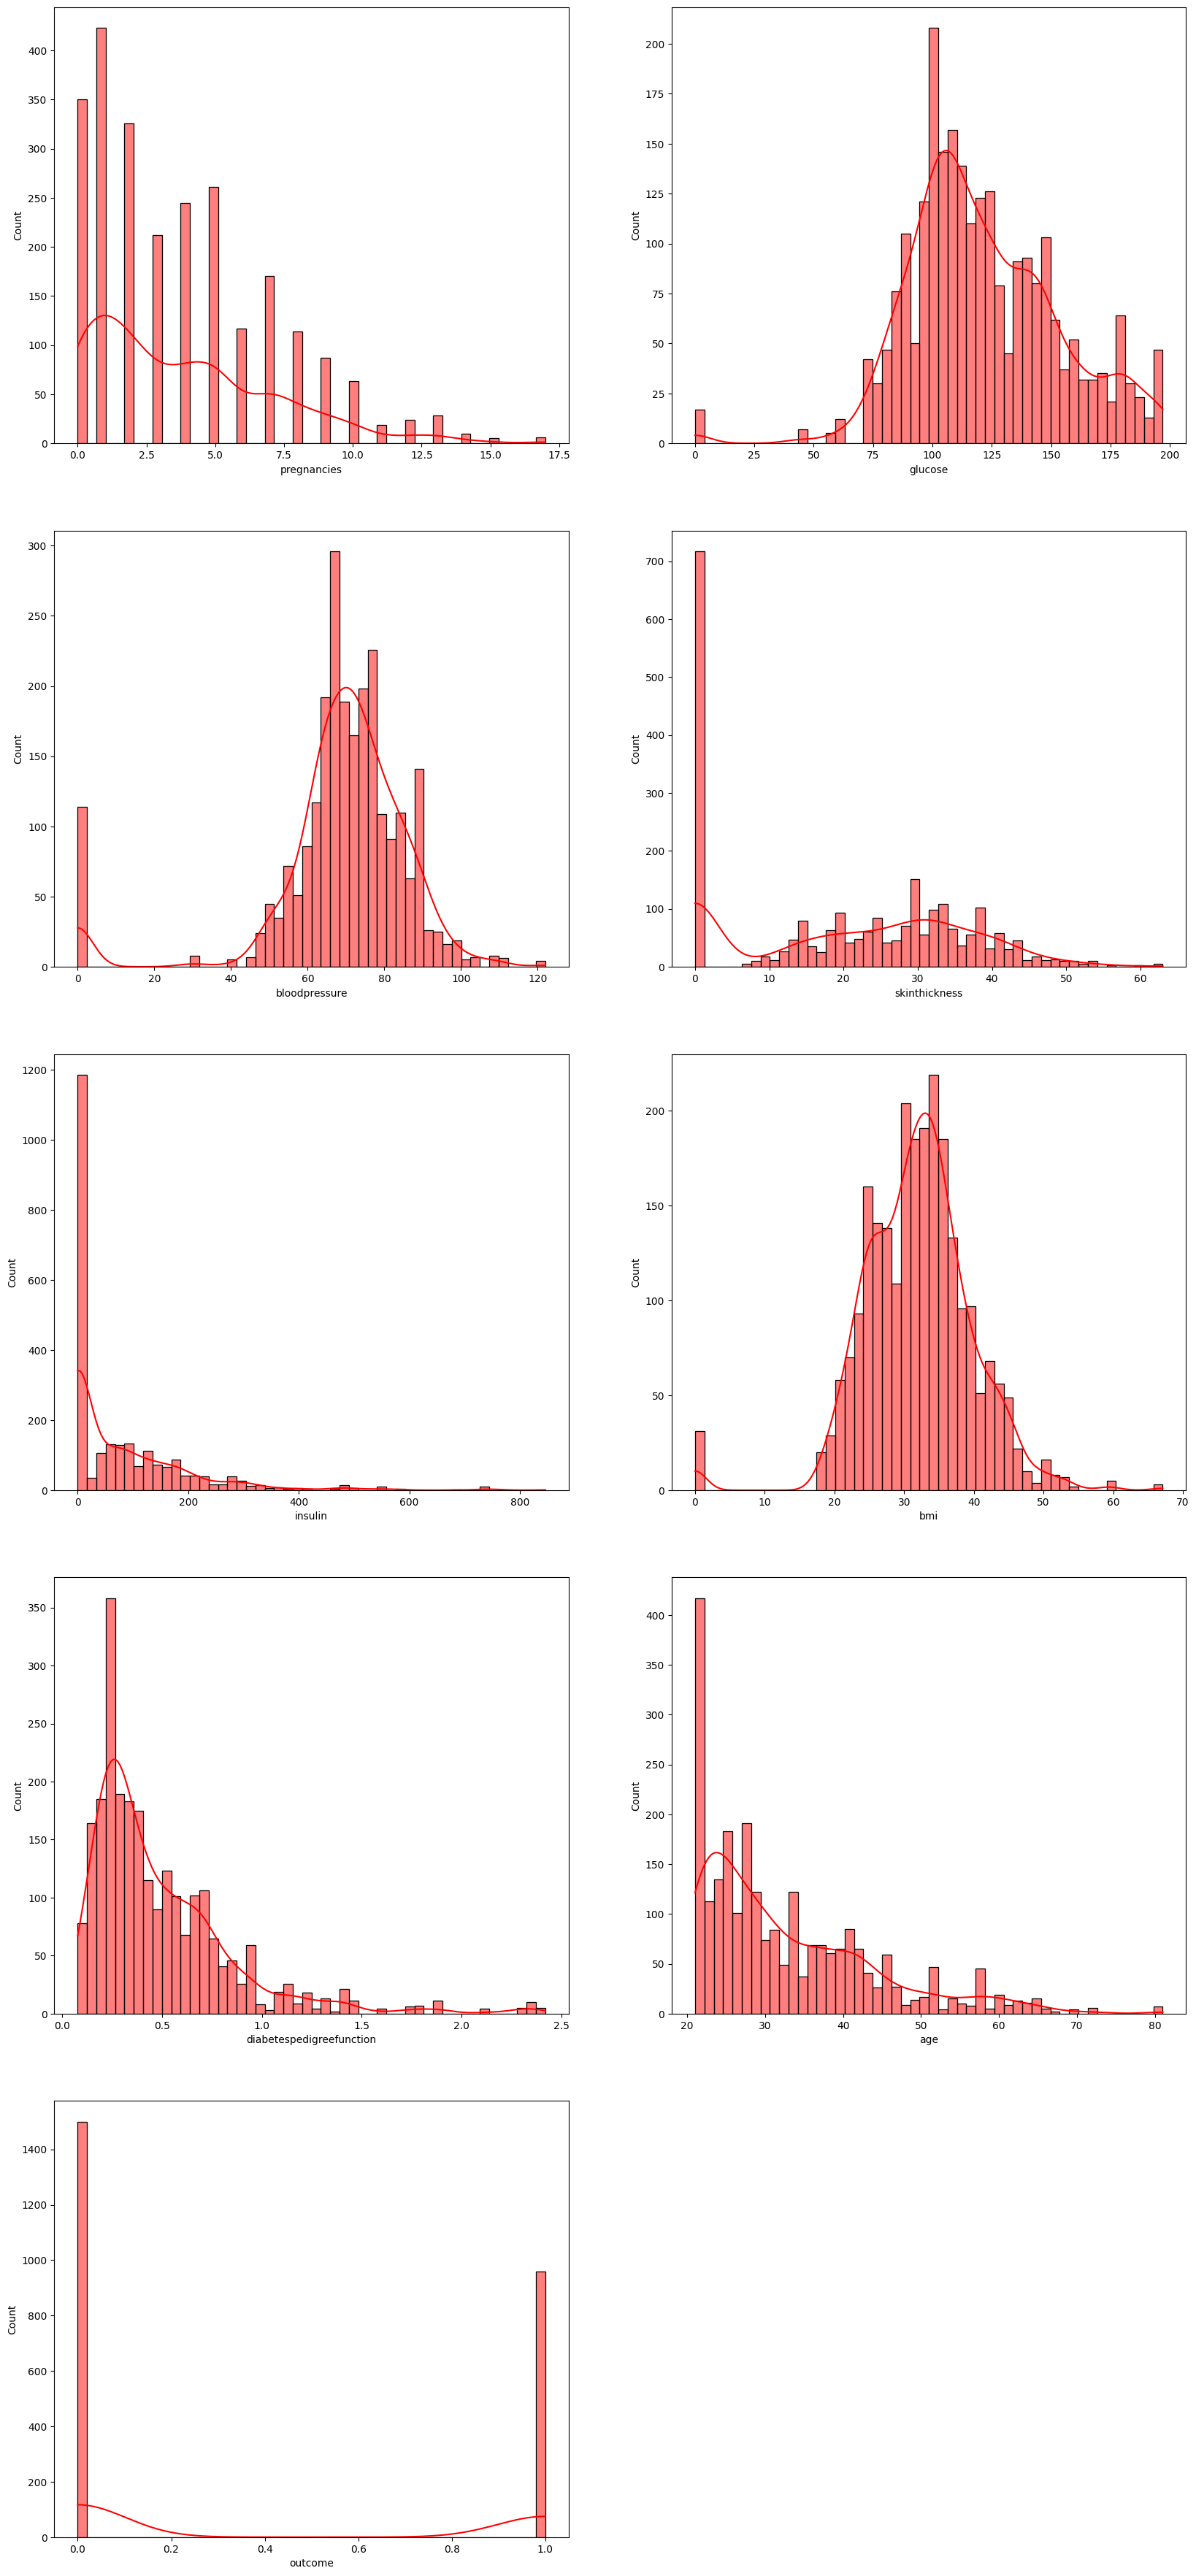

In [4]:
# Check data distribution

plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'r')
plt.show

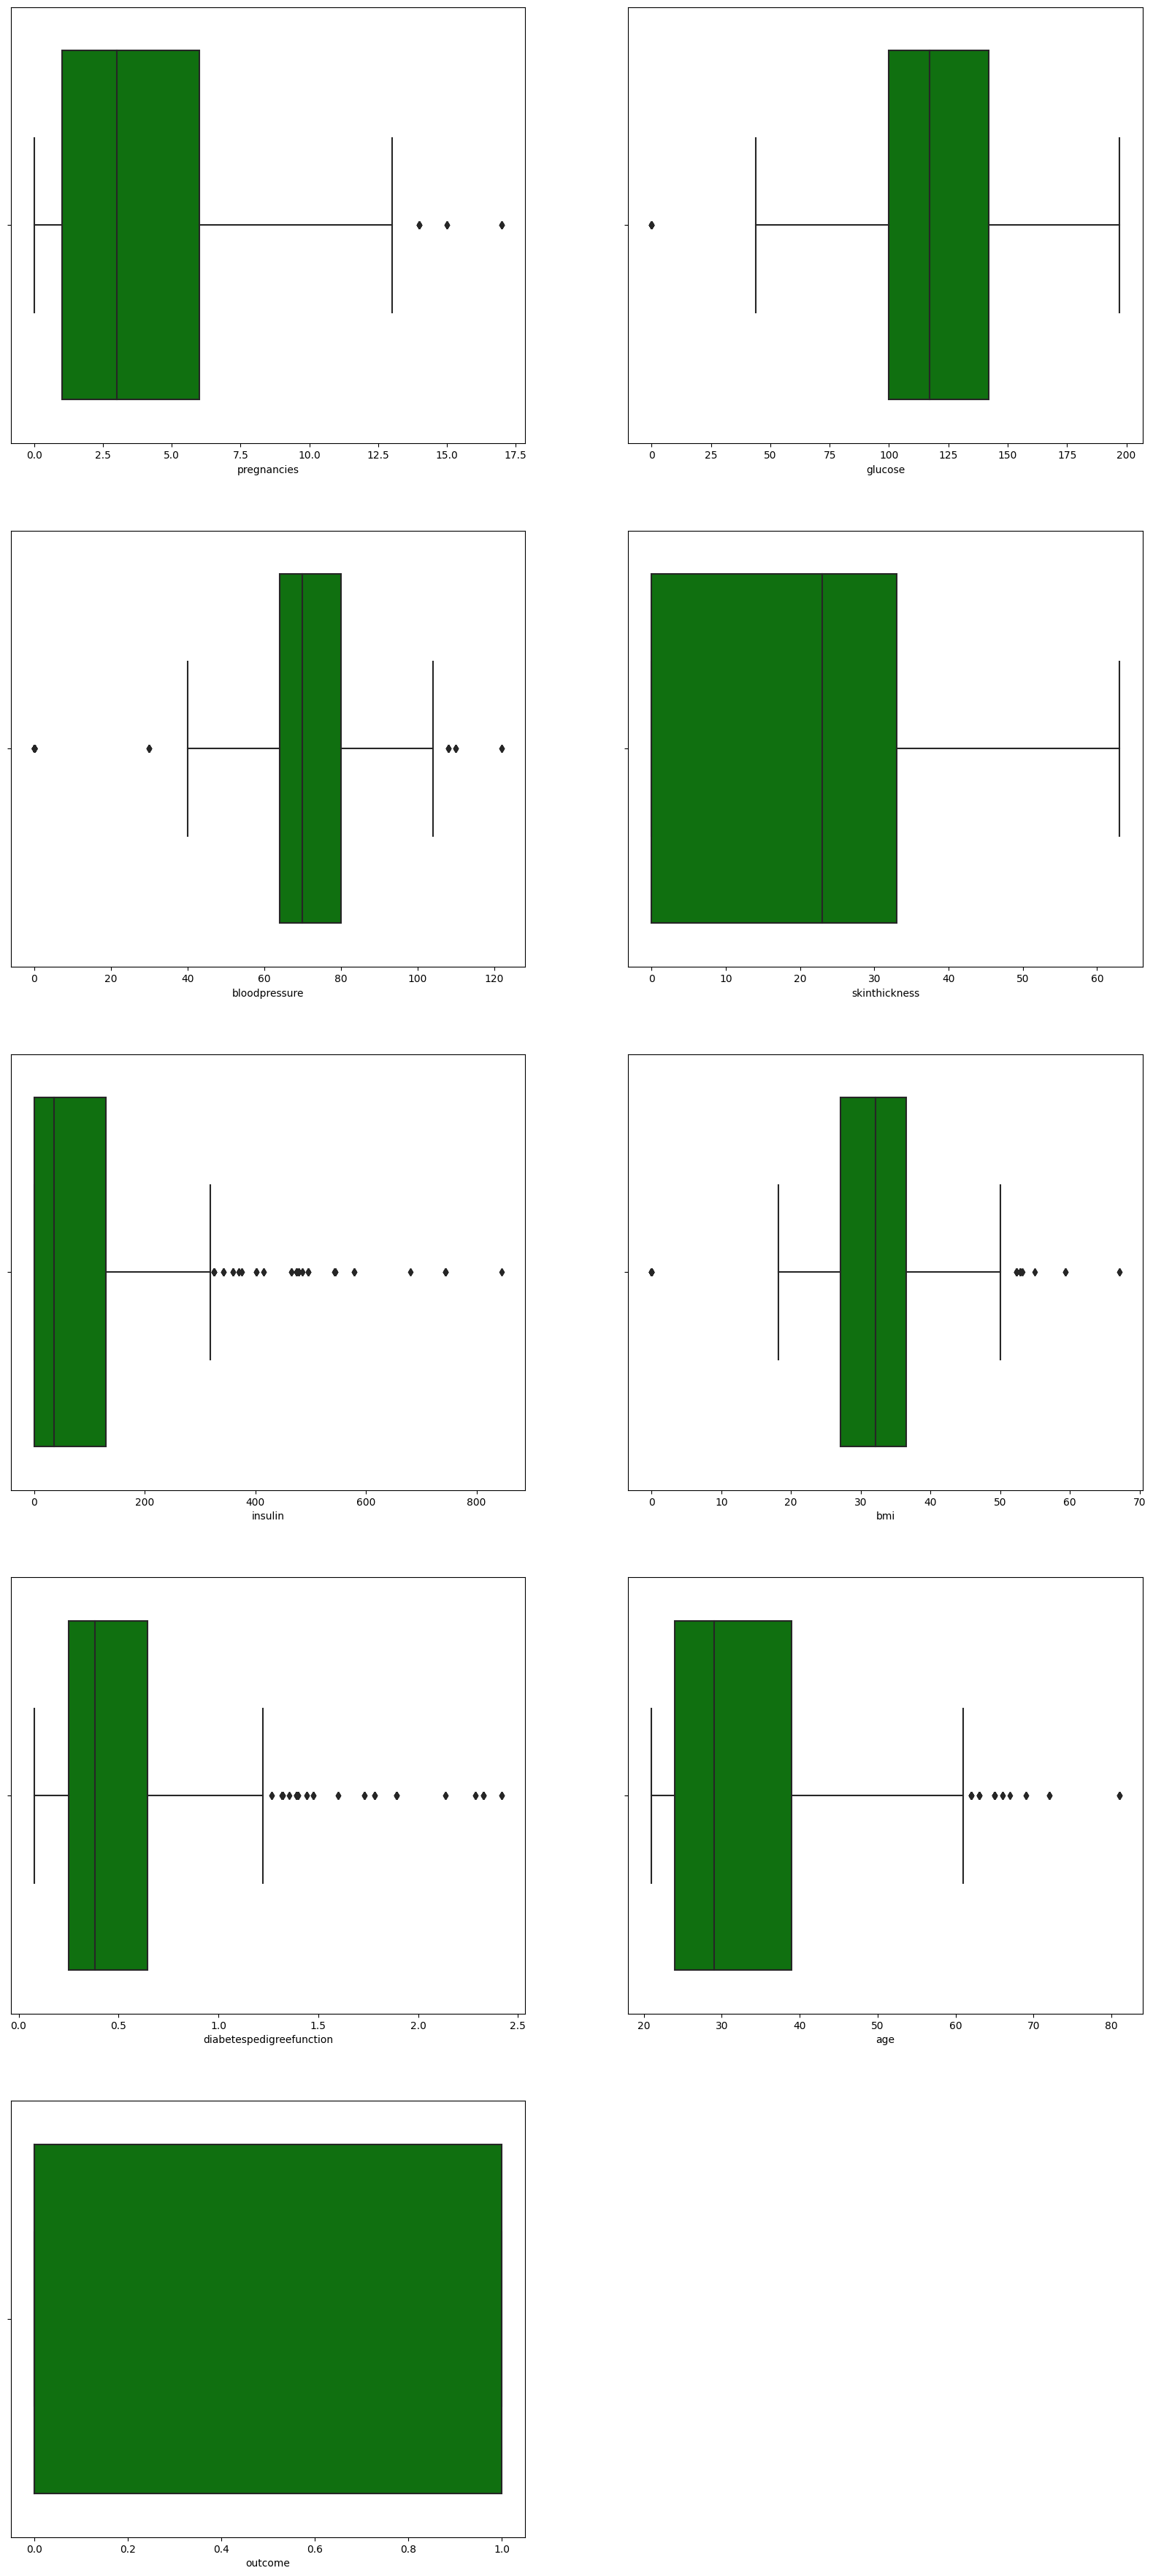

In [5]:
# Outliers detection using BoxPlot

plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'g')
plt.show()

In [6]:
df.shape

(2460, 9)

In [7]:
# Data normalization using Z score 

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

z_score = zscore(df)
outliers = (np.abs(z_score)>3)
outliers.sum()

pregnancies                  21
glucose                      17
bloodpressure               114
skinthickness                 0
insulin                      54
bmi                          39
diabetespedigreefunction     52
age                          19
outcome                       0
dtype: int64

In [8]:
# remove extreme valus using Winsorization

winsored_df = df.apply(lambda x: winsorize(x, limits = 0.05))
winsored_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.191,33,1


In [9]:
df.shape

(2460, 9)

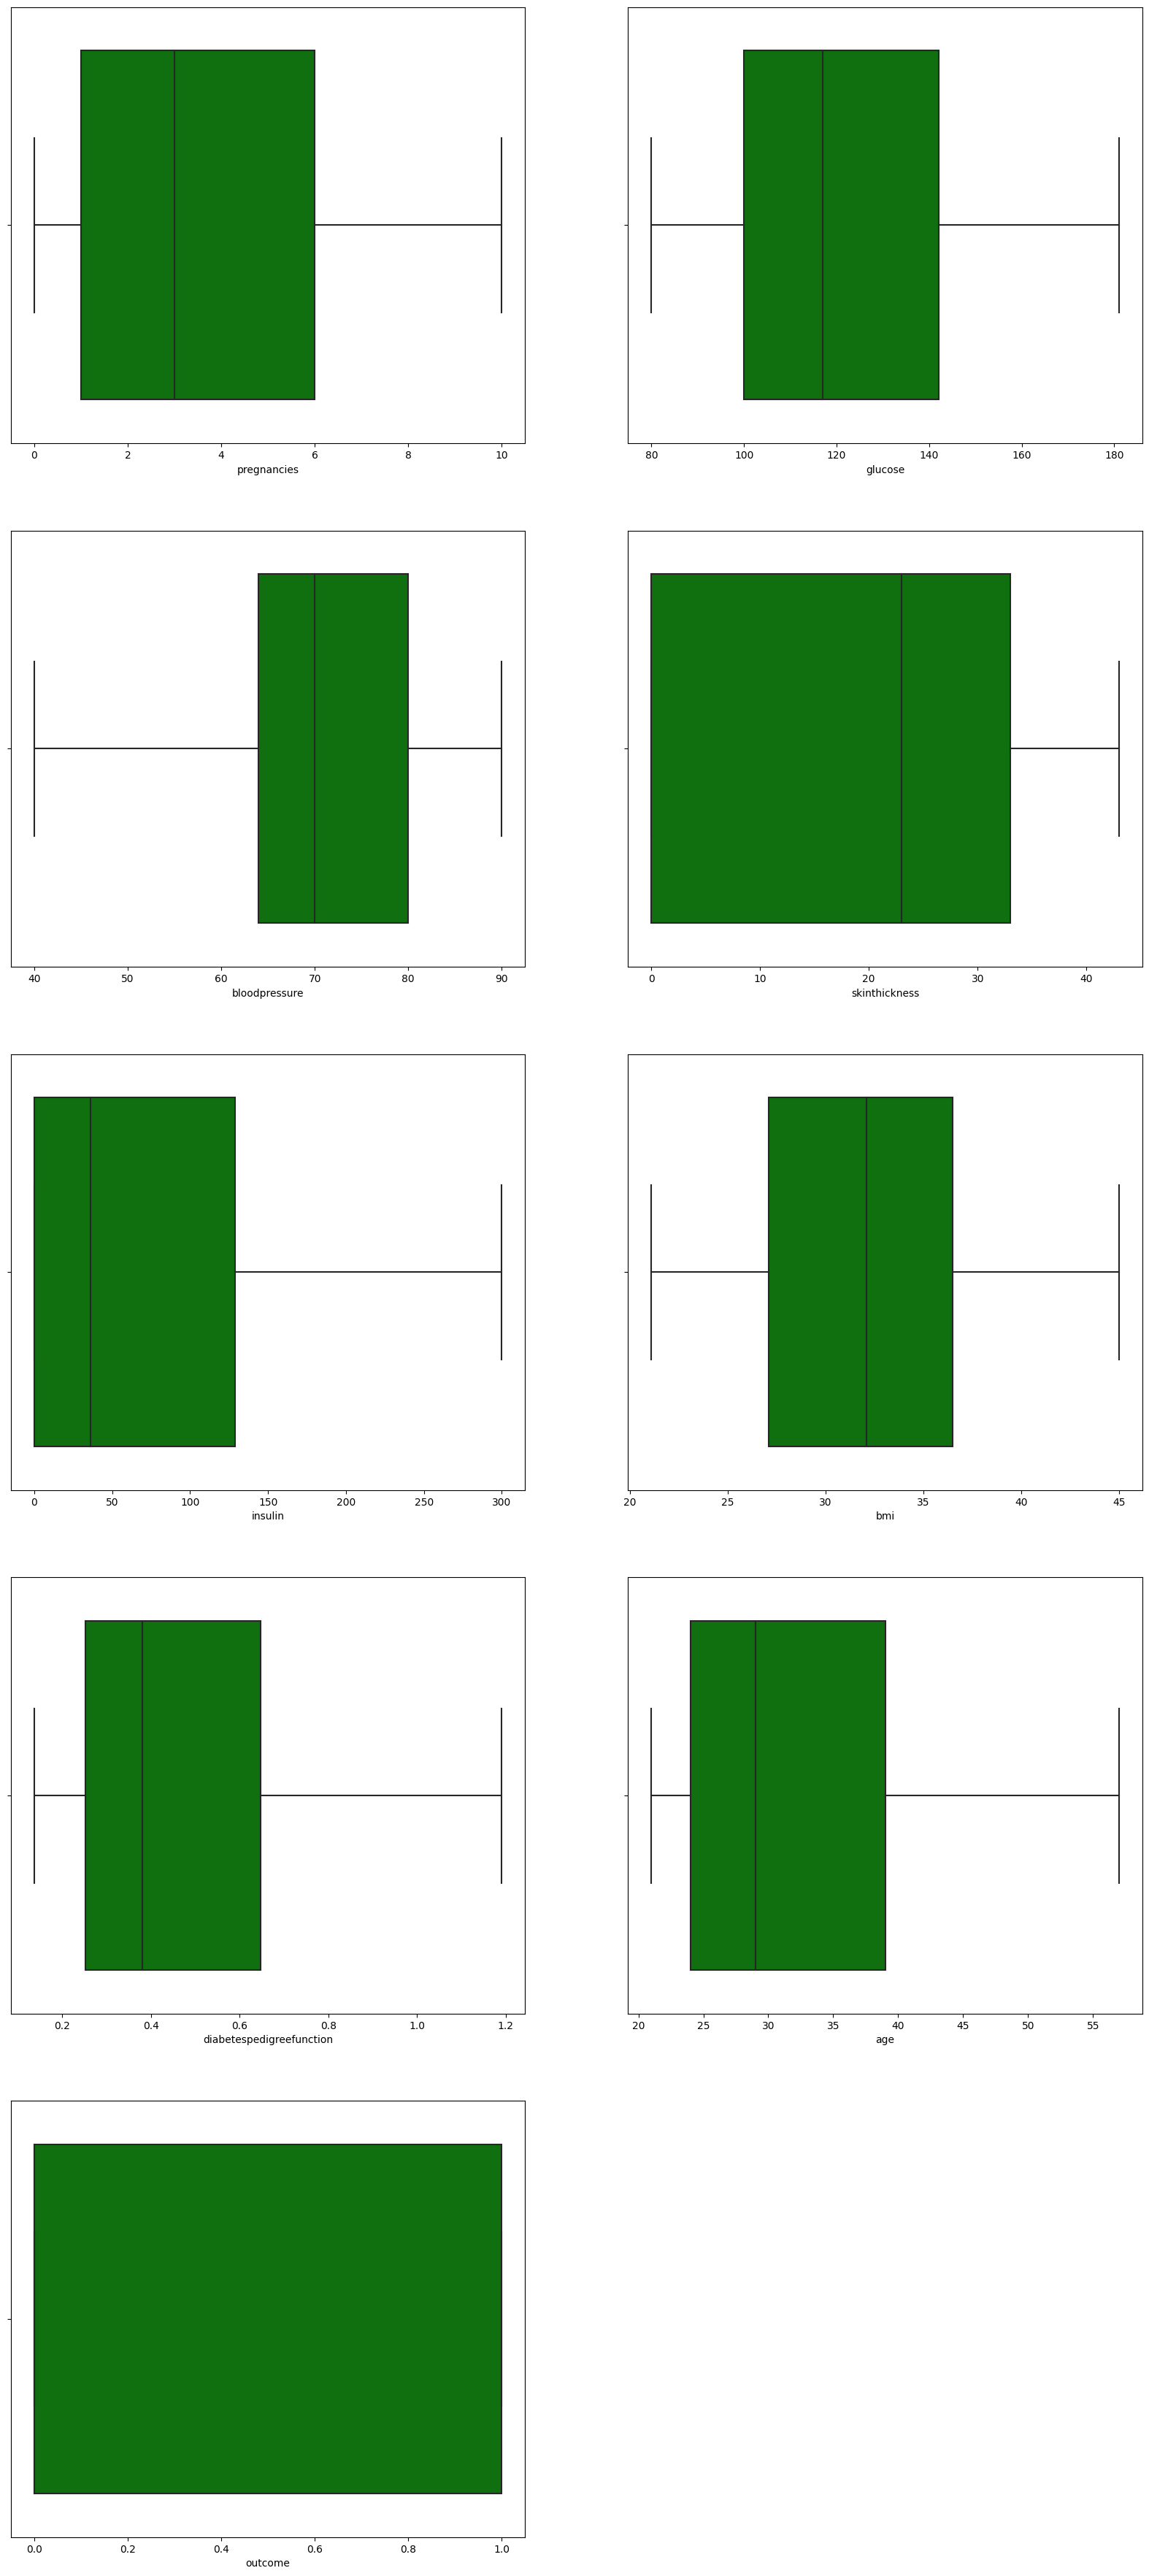

In [10]:
# recheck outliars

plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_df, x = col, color = 'g')
plt.show()

In [11]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [12]:
pearson_coef_val = []
p_val = []

for col in winsored_df.columns:
    pearson_coef, p_value = stats.pearsonr(winsored_df[col], winsored_df['outcome'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))
    

In [13]:
p_val

[0.0, 0.0, 0.0, 0.0006, 0.0, 0.0, 0.0, 0.0, 0.0]

In [14]:
# hypothesis test

is_significant = []

for i in p_val:
    if i>0.1:
        is_significant.append('No')
    else:
        is_significant.append('Yes')
is_significant

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [15]:
data = {
    'Feature': winsored_df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,pregnancies,0.211322,Yes
1,glucose,0.461138,Yes
2,bloodpressure,0.126458,Yes
3,skinthickness,0.068747,Yes
4,insulin,0.124096,Yes
5,bmi,0.322668,Yes
6,diabetespedigreefunction,0.178062,Yes
7,age,0.244095,Yes
8,outcome,1.000000,Yes


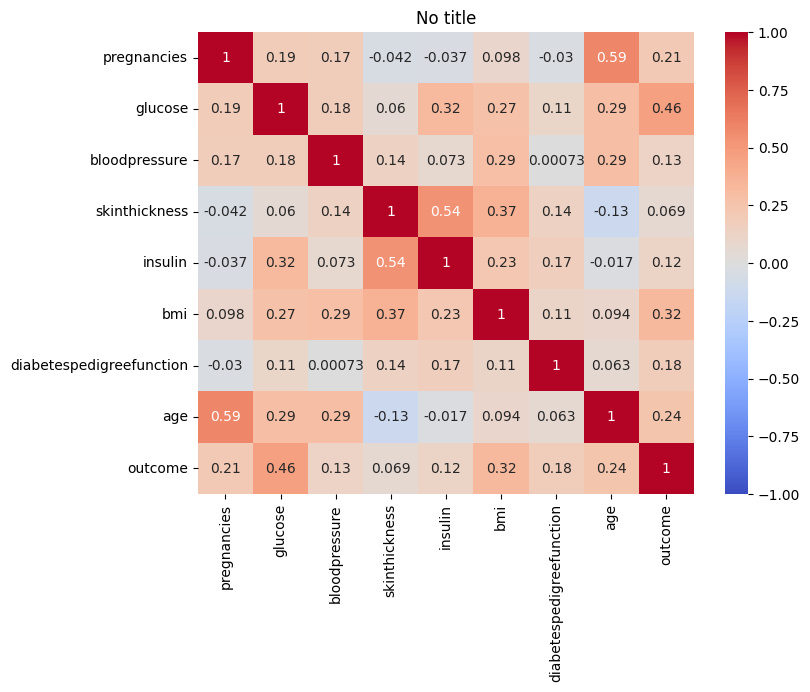

In [16]:
corr_matrix = winsored_df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('No title')
plt.show()

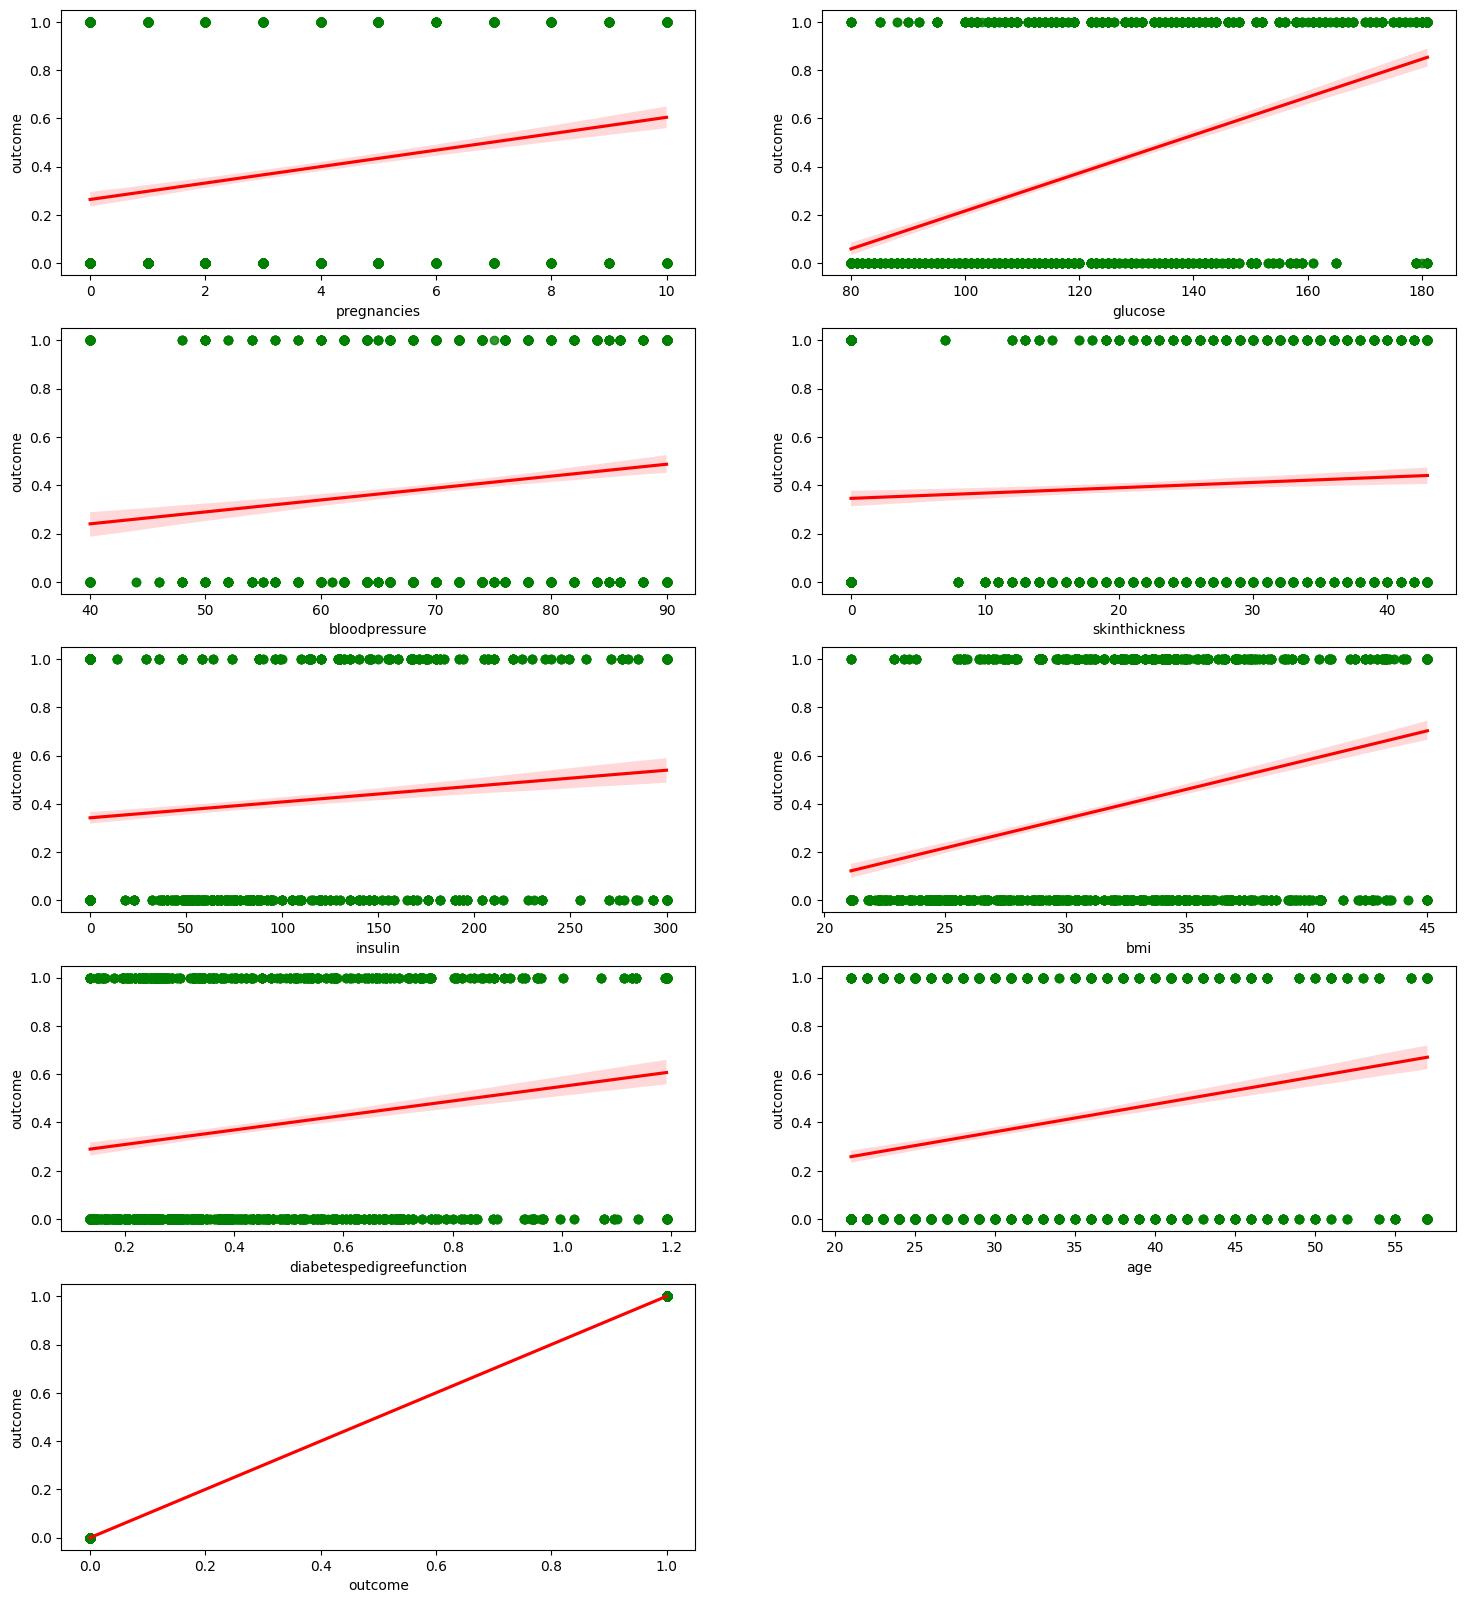

In [17]:
plt.figure(figsize = (18, 20))
for i, col in enumerate(winsored_df.columns):
    plt.subplot(5, 2, i+1)
    sns.regplot(data = winsored_df, x = col, y = 'outcome', color = 'g', line_kws = {'color':'red'})
plt.show()

In [18]:
winsored_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,181,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.191,33,1


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('outcome', axis = 1) # independent
y = df['outcome'] # dependent

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(1968, 8)

In [22]:
y_train.shape

(1968,)

In [23]:
X_test.shape

(492, 8)

In [24]:
X_train

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
231,6,134,80,37,370,46.2,0.238,46
976,8,118,72,19,0,23.1,1.476,46
135,2,125,60,20,140,33.8,0.088,31
25,10,125,70,26,115,31.1,0.205,41
582,2,134,70,0,0,28.9,0.542,23
...,...,...,...,...,...,...,...,...
1638,6,80,66,30,0,26.2,0.313,41
1095,5,109,62,41,129,35.8,0.514,25
1130,4,184,78,39,277,37.0,0.264,31
1294,7,196,90,0,0,39.8,0.451,41


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[ 0.6520299 ,  0.37633964,  0.59211554, ...,  1.81128155,
        -0.68179455,  1.18365243],
       [ 1.26118957, -0.12672466,  0.17096049, ..., -1.12944166,
         2.66831846,  1.18365243],
       [-0.56628944,  0.09336597, -0.46077209, ...,  0.23271152,
        -1.08770485, -0.16642754],
       ...,
       [ 0.04287023,  1.94841556,  0.48682678, ...,  0.64008443,
        -0.61143676, -0.16642754],
       [ 0.95660973,  2.32571378,  1.11855936, ...,  0.99653573,
        -0.10540192,  0.73362578],
       [-0.2617096 , -0.47258136, -0.35548333, ..., -1.15490246,
         0.50887566, -0.8864702 ]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate
model = KNeighborsClassifier(n_neighbors = 7)
# train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [30]:
y_test

1949    0
1480    0
1087    1
2349    0
1714    0
       ..
962     0
2443    0
1344    0
1989    1
368     0
Name: outcome, Length: 492, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
accuracy = accuracy_score(y_pred, y_test)
print(f'{round(accuracy*100, 2)}%')

88.41%
